#Clasificación del dataset Iris usando KNN

Presentado por:

Isabella Torres Revelo

Nicolas Diaz Salazar


Se importan las librerías necesarias

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Se carga el dataset Iris y se lo visualiza como un diccionario

In [ ]:
iris = load_iris()
iris #se observa el dataset en forma de diccionario

Se convierte el dataset Iris a un DataFrame de Pandas y se lo visualiza

In [ ]:
iris2 = pd.DataFrame(np.c_[iris.data,iris.target], columns=iris['feature_names'] + ['target']) #se transforma el dataset a un dataframe de pandas
iris2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Se calcula la matriz de correlación con el método `corr` de pandas y se la grafica con el método `heatmap`de la librería `seaborn`

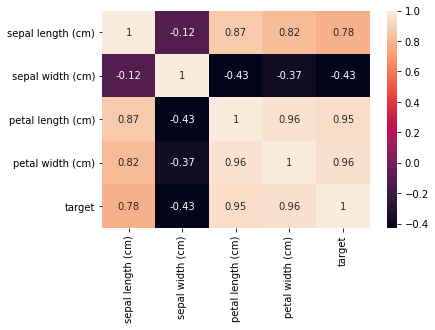

In [ ]:
import seaborn as sns
corr = iris2.corr() #se calcula la matriz de correlación
corr_max = sns.heatmap(corr, xticklabels=iris2.columns, yticklabels=iris2.columns, annot=True) #se crea matriz de correlación 
plt.show()

Con el método `plotting.scatter_matrix`de la librería `pandas`se obtiene una matriz de gráficos de dispersión que brindan información relevante sobre la correlación de las variables (features) que conforman el dataset. 

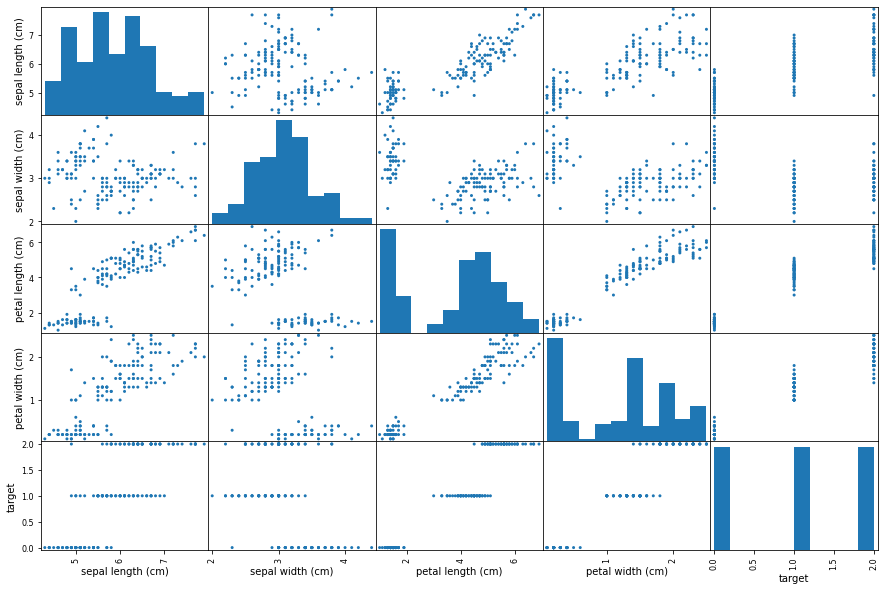

In [ ]:
pd.plotting.scatter_matrix(iris2, alpha=1, figsize=(15,10), grid=True) #se observan las diferentes características de las muestras 
plt.show()

Para visualizar de manera más clara la correlación entre las variables se puede obtener gráficos de dispersión individuales con el método `scatter`de la librería de `matplotlib`.

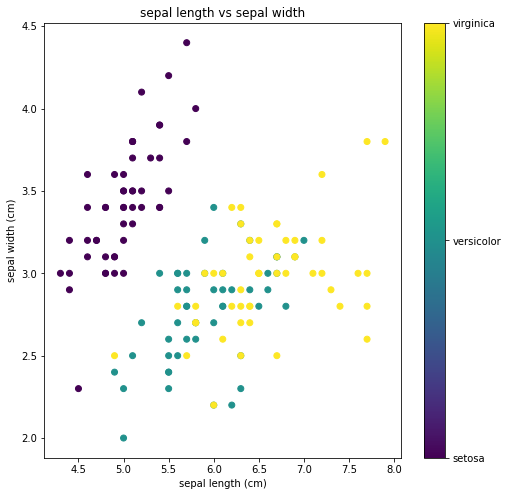

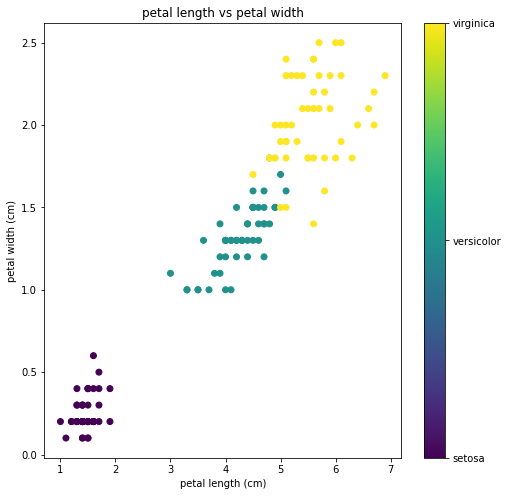

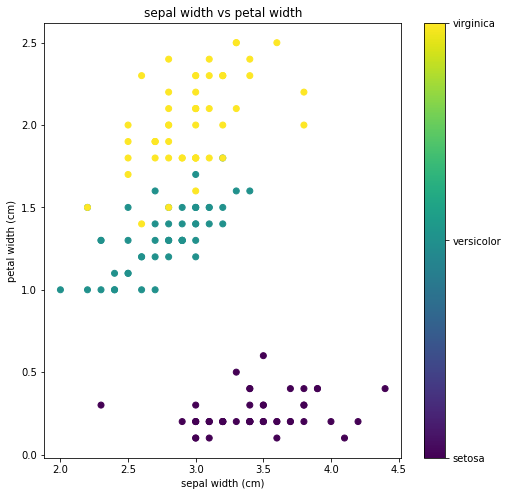

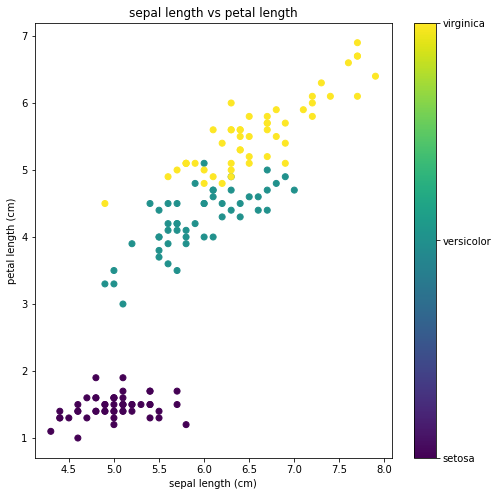

In [ ]:
#se grafican las características de las muestras
iris = load_iris()
fig0 = plt.figure(figsize=(8,8))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("sepal length vs sepal width")

fig1 = plt.figure(figsize=(8,8))
plt.scatter(iris.data[:,2],iris.data[:,3], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("petal length vs petal width")
plt.show()

fig4 = plt.figure(figsize=(8,8))
plt.scatter(iris.data[:,1],iris.data[:,3], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.title("sepal width vs petal width")
plt.show()

fig5 = plt.figure(figsize=(8,8))
plt.scatter(iris.data[:,0],iris.data[:,2], c=iris.target)
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("sepal length vs petal length")
plt.show()



##Creación del modelo de clasificación y entrenamiento

Se divide el dataset con una proporción de 80% para training y 20% para test, con una *seed* que garantiza que la distribución probabilística de los datos se conserve al reiniciar el entorno de ejecución y con el parámetro *stratify* para que el dataset sea dividido de forma estratificada.

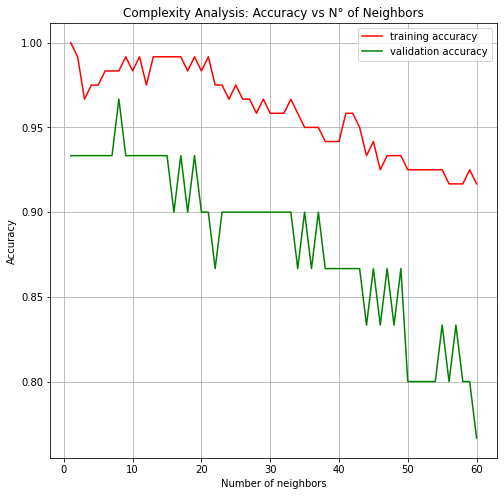

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=45, stratify=iris.target) 
training_accuracy = [] #se crea lista vacía para almacenar el valor de accuracy del entrenamiento
validation_accuracy = [] #se crea lista vacía para almacenar el valor de accuracy de la validación

number_of_neighbors = range(1,61) #se genera rango de número de vecinos del 1 a 60

for i in number_of_neighbors:
  clf = KNeighborsClassifier(n_neighbors=i) #se crea el modelo con el hiperparámetro k de número de vecinos que fue definido por el rango.
  clf.fit(X_train, Y_train) #se entrena el modelo pasándole el array de datos de entrenamiento con su respectivo array de etiquetas

  training_accuracy.append(clf.score(X_train, Y_train)) #se calcula el valor de accuracy sobre los datos de entrenamiento
  validation_accuracy.append(clf.score(X_val,Y_val)) #se calcula el valor de accuracy sobre los datos de validación


fig2 = plt.figure(figsize=(8,8))
plt.plot(number_of_neighbors,training_accuracy,label="training accuracy", c='r') #se grafica la curva de training accuracy
plt.plot(number_of_neighbors,validation_accuracy,label="validation accuracy", c='g') # se grafica la curva de validation accuracy
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title('Complexity Analysis: Accuracy vs N° of Neighbors')
plt.grid(True)
plt.show()



## Análisis de Complejidad

Teninendo en cuenta la gráfica anterior, se puede observar que cuando el modelo emplea 8 vecinos más cercanos, se obtiene un accuracy aproximadamente de 0.9666 en el dataset de validación.
A medida que el número de vecinos cercanos aumenta, el accuracy en el conjunto de validación drecece debido a que el modelo se hace más simple.
Por tal razón, se decide entrenar de nuevo el modelo definiendo el hiperparámetro de número de vecinos con un valor de k=8 para proceder a calcular y evaluar el desempeño del clasificador con la matriz de confusión y las métricas.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


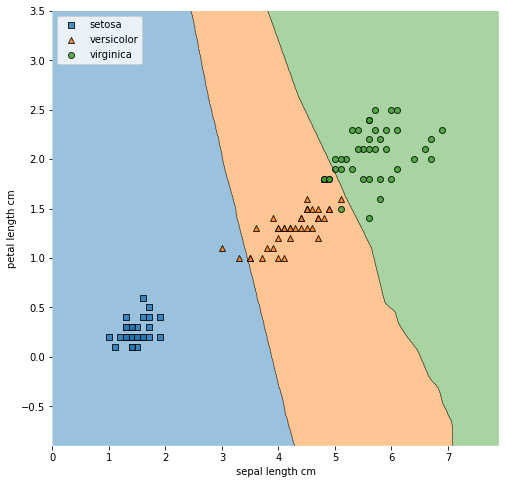

In [ ]:
clf_1 = KNeighborsClassifier(n_neighbors=8) #se crea un nuevo modelo con hiperparámetro k=8 basado en el análisis de complejidad anterior
clf_1.fit(X_train, Y_train) #se entrena nuevo modelo
fig3 = plt.figure(figsize=(8,8))
value = 5 #valor para utilizar el método plot decision regions
width = 7  #valor para utilizar el método plot decision regions
ax = plot_decision_regions(X_train,Y_train, clf=clf_1, legend=2, feature_index=[2,3] ,filler_feature_values={0: value, 1:value}, filler_feature_ranges={0: width, 1:width})  #se grafica las zonas de decisión del modelo
plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['setosa', 'versicolor', 'virginica'], loc='upper left')
plt.show()


##Matriz de Confusión

Se debe realizar el cálculo de la predicción del modelo cuando se le ingresan los datos de validación.

Se importa el método `confusion_matrix`de la librería `sklearn.metrics`, el cual recibe como parámetros el arreglo de las etiquetas de los datos de validación y las etiquetas de los datos predichos por el clasificador.

Por último, la matriz de confusión se visualiza de manera gráfica y con mapas de calor gracias al método `heatmap`de la librería `seaborn`.

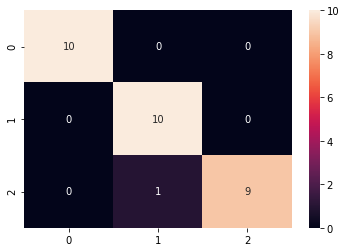

In [ ]:
Y_pred = clf_1.predict(X_val)#se realiza predicción sobre dataset de validacion
from sklearn.metrics import confusion_matrix
confu_mat = sns.heatmap(confusion_matrix(Y_val, Y_pred), annot=True) #se grafica la matriz de confusion utilizando el heatmap de seabron

Como se puede observar, el clasificador solamente predijo mal un dato: clasificó una planta que pertenece a la clase *virginica* en la clase *versicolor*.

También se graficó la matriz de confusión utilizando el método directo `plot_confusion_matrix`de la librería `sklearn.metrics`el cual recibe como parámetros el clasificador, el arreglo de los datos de validación y el arreglo de las etiquetas correspondientes a esos datos.

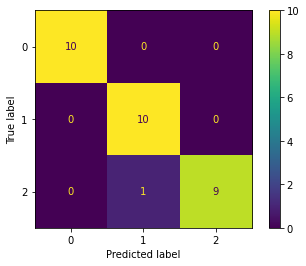

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_1, X_val, Y_val) #se crea matriz de confusion solo con el metodo de la libreria sklearn
plt.show()

##Métricas del modelo de clasificación 

Utilizando el método `classification_report`de la librería `sklearn.metrics`se obtuvieron métricas como precisión, recall, accuracy, f1-score, entre otros.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_pred, target_names=iris.target_names)) #se obtienen las métricas del modelo.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_val, Y_pred, average='macro')

(0.9696969696969697, 0.9666666666666667, 0.9665831244778613, None)

## Métricas Matriz de Confusión

***Precisión*** indica qué tan preciso es el modelo a la hora de predecir positivos. La ecuación para calcular *precision* es:
\begin{equation}
Precision = \frac{True\;positive}{True\;positive + False\;positive}
\end{equation}
\
\begin{equation}
Precision = \frac{True\;positive}{Total\;predicted\;positive}
\end{equation}

Se emplea normalmente para determinar cuando el costo de tener un **falso positivo** es alto. Por ejemplo, diagnóstico de alguna patología, si el modelo predice que un paciente es positivo para una bacteria pero en realidad no lo es, y es tratado para esta, es posible que presente complicaciones en su salud a causa de los medicamentos que están siendo aplicados para una bacteria que no existe. En este caso, que el modelo tenga poca precisión no es aceptable.\



***Recall*** indica la tasa de las predicciones positivas de todas las muestras positivas. También llamado sensibilidad o *true positive rate*. Su ecuación es:\
\
\begin{equation}
Recall = \frac{True\;positive}{True\;positive + False\;negative}
\end{equation}
\
\begin{equation}
Recall = \frac{True\;positive}{Total\;actual\;positive}
\end{equation}

Se emplea para casos donde tener un falso negativo es crítico, siguiendo con el ejemplo del diagnóstico de patologías, si se predice un paciente que tenga un virus muy contagioso como "sano" (falso negativo) es posible que se esparza el virus. En este caso el modelo debe tener un buen recall para clasificar verdaderos positivos.\
\
***Accuracy*** es la tasa de las predicciones correctas sobre el número total de muestras:\
\
\begin{equation}
Accuracy = \frac{Number\;of\;correct\;predictions}{Total\;number\;of\;predictions}
\end{equation}



Para el modelo de kNN entrenado en este trabajo, se obtuvieron las siguientes métricas:
* Precision: 0.96
* Recall: 0.96
* Accuracy: 0.96